In [20]:
pip install deepface

In [21]:
##  DeepFace je open-source knihovna pro rozpoznávání obličejů pomocí hlubokého učení. Umožňuje snadné použití předtrénovaných modelů pro analýzu tváří, včetně.
## Odhad pohlaví a věku, Rozpoznání obličeje (identifikace osoby), Analýza emocí (šťastný, smutný, naštvaný atd.)

In [23]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from deepface import DeepFace
import os

In [142]:
obrazek = cv2.imread('Training_94973918.jpg') # načítam obrazek
## obrazek = obrazek.resize(512, 420)
## obrazek = cv2.imread('Training_10120469.jpg') # načítam obrazek
## obrazek = cv2.cvtColor(obrazek, cv2.COLOR_GRAY2RGB)  # konverze barev z BlueGreenRed na RedGreenB
## obrazek

In [143]:
##  Zjištění kolik kanálu má fotka.

# obrazek = cv2.imread('Training_10120469.jpg')  # Načtení obrázku

# if obrazek is None:
#     print("Chyba: Obrázek se nepodařilo načíst.")
# else:
#     print(f"Rozměry obrázku: {obrazek.shape}")  # Výstup: (výška, šířka, kanály)

#     if len(obrazek.shape) == 2:  # Černobílý obrázek
#          obrazek = cv2.cvtColor(obrazek, cv2.COLOR_GRAY2RGB)
#     elif obrazek.shape[2] == 3:  # Již barevný obrázek
#          print("Obrázek je již RGB/BGR, konverze není nutná.")
#     else:
#          print("Neočekávaný formát obrázku.")

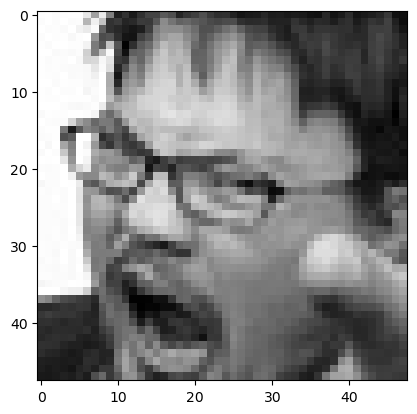

In [144]:
## plt.imshow(obrazek, cmap='gray')
plt.imshow(obrazek)

Krok číslo 1.
 - definice cesty k adresáří s emocemi path =
 C:\Users\zitao\Documents\PETR\DATA SCIENCE\EMOCE\train

 - definice cesty k adresáři s konkrétními emocemi

 - definice cesty ke kontrétnimu souboru/fotce
 - pokud výsledek analýzy emoce z fotky nebude odpovídat názvu složky "emoce" zapiš název souboru, který právě zkoumáne, zapiš do seznamu nevhodných souborů ( fotku, kterou nechceme)
 - Opakuj pro každý soubor v dané složce -->

## Zobrazení obrázku na plotu

In [146]:
path = r"C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE"

In [27]:
fotky_emoce = os.listdir(f"{path}/train")
fotky_emoce

['angry',
 'angry_mimo',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'sad',
 'surprise']

In [28]:
len(fotky_emoce)

8

In [29]:
nazev_složky = fotky_emoce [0]

In [30]:
## plt.imshow(obrazek)
## plt.show()

In [73]:
seznam_souboru = os.listdir(f"{path}/train/{nazev_složky}")

In [74]:
cesta_angry = (f"{path}/train/{nazev_složky}")

In [75]:
cesta_angry

'C:\\Users\\zitao\\Documents\\PETR\\DATA_SCIENCE\\EMOCE/train/angry'

In [76]:
len(cesta_angry)

60

## Analýza obrázku

In [165]:
## definice seznamu obrázků
seznam_obrazku = []

In [166]:
počet = 0
obrazek_analyza = ""

In [167]:
obrazek_analyza = cv2.imread(f"{cesta_angry}/Training_94973918.jpg") # načítam obrazek
## obrazek = cv2.cvtColor(obrazek, cv2.COLOR_GRAY2BGR)  # konverze barev z BlueGreenRed na RedGreenB
## prediction = DeepFace.analyze(obrazek,  actions = ['emotion'])

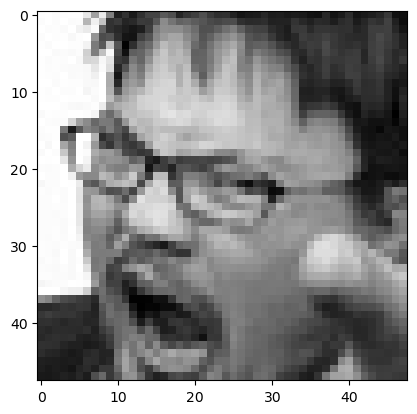

In [168]:
plt.imshow(obrazek_analyza)

In [173]:
 prediction_analyza = DeepFace.analyze(obrazek_analyza, enforce_detection=False)

Action: race: 100%|██████████| 4/4 [00:15<00:00,  3.96s/it]  


In [174]:
prediction_analyza

[{'emotion': {'angry': 99.1403044294948,
   'disgust': 1.0102687446591701e-09,
   'fear': 1.2578935503601103e-05,
   'happy': 1.9632406691434825e-07,
   'sad': 0.4974305036746855,
   'surprise': 2.844626523846375e-05,
   'neutral': 0.3622286288391198},
  'dominant_emotion': 'angry',
  'region': {'x': 0,
   'y': 0,
   'w': 47,
   'h': 47,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0,
  'age': 35,
  'gender': {'Woman': 0.008875964704202488, 'Man': 99.99111890792847},
  'dominant_gender': 'Man',
  'race': {'asian': 99.93545413017273,
   'indian': 0.023023773974273354,
   'black': 0.014961551642045379,
   'white': 0.01480064820498228,
   'middle eastern': 0.00042622341425158083,
   'latino hispanic': 0.011333989823469892},
  'dominant_race': 'asian'}]

In [177]:
emoce =  prediction_analyza[0]['dominant_emotion'], prediction_analyza[0]['dominant_race'], prediction_analyza[0]['dominant_gender']
emoce

('angry', 'asian', 'Man')

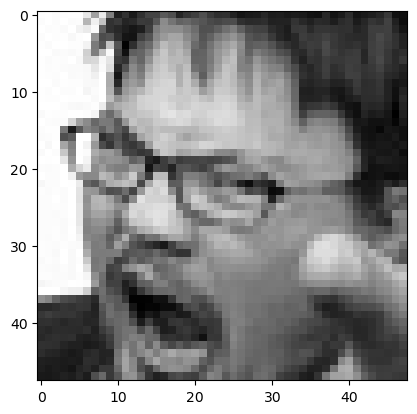

In [178]:
plt.imshow(obrazek_analyza)

In [162]:
seznam_fotek_NOK = []
seznam_fotek_OK = []
chybny_soubor = []

In [163]:
for obrazek1 in os.listdir(cesta_angry):  
    cesta_obrazku = os.path.join(cesta_angry, obrazek1)  
    obrazek2 = cv2.imread(cesta_obrazku)  

    if obrazek2 is None:
        print(f"Chyba: Obrázek {obrazek1} se nepodařilo načíst.")
        chybny_soubor.append(obrazek1)  # Uložit název souboru, ne None
        continue  

    try:
        prediction = DeepFace.analyze(obrazek2, actions=['emotion'])
        emoce = prediction[0]['dominant_emotion']

        if emoce == 'angry':
            seznam_fotek_OK.append(cesta_obrazku)
        else:
            seznam_fotek_NOK.append(cesta_obrazku)

    except ValueError as e:
        print(f"Chyba: DeepFace nemohl analyzovat {cesta_obrazku} – {e}")
        chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor
    except Exception as e:
        print(f"Neočekávaná chyba u {cesta_obrazku}: {e}")
        chybny_soubor.append(cesta_obrazku)  # Uložit problematický soubor



# for obrazek1 in os.listdir(cesta_angry):  # Získání seznamu souborů ve složce
#     cesta_obrazku = os.path.join(cesta_angry, obrazek1)  # Spojí složku + soubor
#     obrazek2 = cv2.imread(cesta_obrazku)  # Načtení obrázku
  
#     if obrazek2 is None:
#         print(f"Chyba: Obrázek {obrazek1} se nepodařilo načíst.")
#         chybny_soubor.append(obrazek2)
#         continue  # Přeskočí na další iteraci, pokud se obrázek nenačte

#     ## try:
#         prediction = DeepFace.analyze(obrazek2, actions=['emotion'])
#         emoce = prediction[0]['dominant_emotion']

#         if emoce == 'angry':
#             seznam_fotek_OK.append(obrazek2)
        
#         if emoce != 'angry':
#             seznam_fotek_NOK.append(obrazek2)
#         else:chybny_soubor.append(obrazek2)
#         continue
            
#     # except ValueError as e:
#     #     print(f"Chyba: DeepFace nemohl analyzovat {cesta_obrazku} – {e}")
#     #     seznam_fotek_NOK.append(cesta_obrazku)  # Ulož chybný soubor
#     # except Exception as e:
#     #     print(f"Neočekávaná chyba u {cesta_obrazku}: {e}")


Chyba: DeepFace nemohl analyzovat C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/angry\Training_10131352.jpg – Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Chyba: DeepFace nemohl analyzovat C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/angry\Training_10161559.jpg – Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Chyba: DeepFace nemohl analyzovat C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/angry\Training_1021836.jpg – Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Chyba: DeepFace nemohl analyzovat C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE/train/angry\Training_10290703.jpg – Face could not be detected in numpy array.Please confirm that the picture is a face photo or con

KeyboardInterrupt: 

In [137]:
len(seznam_fotek_OK)

1352

In [138]:
len(seznam_fotek_NOK)

1046

In [139]:
len(chybny_soubor)

1596

In [140]:
obrazek1

'Training_99982465.jpg'

In [131]:
print(emoce)

angry


In [132]:
cesta_angry

'C:\\Users\\zitao\\Documents\\PETR\\DATA_SCIENCE\\EMOCE/train/angry'

In [133]:
emoce = prediction[0]['dominant_emotion'],prediction[0]['dominant_race'],prediction[0]['dominant_gender']
emoce

KeyError: 'dominant_race'

In [ ]:
plt.imshow(obrazek)

## Výsledky analýzy

In [ ]:
prediction

##  Určení emocí z obrázku

In [ ]:
predictions = [{prediction[0]['dominant_emotion'],prediction[0]['dominant_gender'],prediction[0]['dominant_race']}]

In [ ]:
predictions

In [ ]:
oblicej = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
usmev = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
bryle = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

cernobily = cv2.cvtColor(obrazek, cv2.COLOR_BGR2GRAY)

## Vyhledavaní obličeje na obrázku a označení čtvercem

# Zobrazení obrázku v černobílém formátu

In [ ]:
plt.imshow(cernobily, cmap='gray')

## Vyhledavame obličej a oramujeme

In [ ]:
face = oblicej.detectMultiScale(cernobily, 1.1, 4)

# scaleFactor=1.3: Určuje, jak moc se velikost obrázku zmenšuje při každém kroku. Nižší hodnota znamená přesnější, ale pomalejší detekci.
# minNeighbors=6: Kolik překrytí musí mít detekce, aby byl výsledek považován za platný. Vyšší číslo = méně falešných poplachů, ale může vynechat slabě detekované obličeje.

# Kreslime rameček kolem tváře
for (x, y, w, h) in face:
    cv2.rectangle(obrazek, (x, y), (x+w, y+h), (255, 0, 0), 2)

# # Kreslime rameček kolem usměvu
oblast_obliceje = cernobily[y:y+h, x:x+w]
## usmevy = usmev.detectMultiScale(oblast_obliceje, scaleFactor=1.2, minNeighbors=6)
smile = usmev.detectMultiScale(oblast_obliceje, 1.8, 8)

for (sx, sy, sw, sh) in smile:
    cv2.rectangle(obrazek, (x+sx, y+sy), (x+sx+sw, y+sy+sh), (0, 255, 0), 2)

# ## Kreslime rameček kolem brylí
glasses = bryle.detectMultiScale(oblast_obliceje, 1.1, 4)
for (sgx, sgy, sgw, sgh) in glasses:
   cv2.rectangle(obrazek, (x+sgx, y+sgy), (x+sgx+sgw, y+sgy+sgh), (0, 0, 255), 2)



In [ ]:
plt.imshow(obrazek)

## Nadpis emoce

In [ ]:
obrazek.shape[2]

In [ ]:
font = cv2.FONT_ITALIC
cv2.putText(obrazek, prediction[0]['dominant_emotion'], (obrazek.shape[1] - 250, 25), font, 1, (255, 0, 0), 2, cv2.LINE_4)
plt.imshow(obrazek)